# Quantification of Color
Notebook shows methods of quantification of color useful for lesion detection.

# Imports

In [1]:
from functions import *
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

## Creating mask
First step is creating a mask to separate pigmented area from background area.

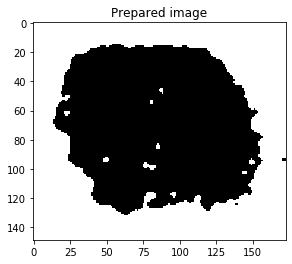

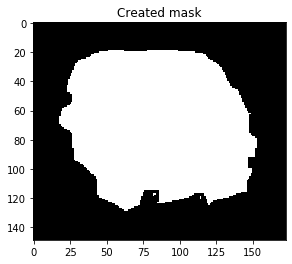

In [2]:
# Creates contour mask using "flood fill" algorithm
# @img - source image
# @cnt - contour to fill
#
# @return img_shape - created mask as image
def create_contour_mask(img, cnt):
    img_shape = shape_matrix(img, cnt)
    img_shape = cv2.bitwise_not(img_shape)
    img_shape = cv2.dilate(img_shape, np.ones((2, 2), np.uint8), iterations=1)
    img_shape = cv2.bitwise_not(img_shape)
    result = cv2.floodFill(img_shape, None,(1, 1), 0)
    return img_shape

# Loading image, thresholding and repairing lesion contour
img = cv2.imread('39.jpg')
img_compensated = remove_uneven_ilumination(img)
img_prepared = prepare_image_peak_slicing(img, median_filter=True)
contour = find_pigmented_contour(img_prepared)
repaired_contour = repair_contour(contour)

# Creating mask
mask = create_contour_mask(img, repaired_contour)

simg(img_prepared, "Prepared image")
simg(mask, "Created mask")

## Blurring original image
Using Gaussian filter.

In [3]:
img_blur = cv2.GaussianBlur(img, (5, 5), 2)

## Defining basic colors
Basic colors are defined in dictionary below.

In [4]:
# BGR FORMAT
basic_colors = {
    'WHITE' : (255, 255, 255),
    'RED' : (51, 51, 204),
    'LIGHT_BROWN' : (0, 102, 153),
    'DARK_BROWN' : (0, 0, 51),
    'BLUE_GRAY' : (255, 153, 51),
    'BLACK' : (0, 0, 0),
}

## Colour counter
Dictionary below works as counter for pixels of processed image.

In [5]:
# counters
color_counter = {
    'WHITE' : 0,
    'RED' : 0,
    'LIGHT_BROWN' : 0,
    'DARK_BROWN' : 0,
    'BLUE_GRAY' : 0,
    'BLACK' : 0,
}

## Distance between image pixel and predefined basic color
Distance is calculated as Euclidian distance in three-dimensional space.

In [6]:
# Computes Euclidian distance between two points in three-dimentional space
# @pt1 - first point
# @pt2 - second point
#
# @return .. - computed distance
def bgr_euclidian_distance(pt1, pt2):
    return int(math.sqrt((pt1[0] - pt2[0])**2 + (pt1[1] - pt2[1])**2 + (pt1[2] - pt2[2])**2))

In [7]:
# Number of pixels in pigmented area
n = int(np.sum(mask[mask == 255])/255)

## Counting image pixels by assignig them to predefined colour
Procedure counts pixels of processed image by assigning every pixel to nearest predefined colour in three-dimensional BGR space (using Euclidian distance).

In [8]:
for x in range(0, mask.shape[0]):
    for y in range(0, mask.shape[1]):
        min_dist = np.inf
        min_dist_color = None
        if mask[x][y] == 255:
            for color, bgr_val in basic_colors.items():
                dist = bgr_euclidian_distance(img[x][y], bgr_val)
                if dist < min_dist:
                    min_dist = dist
                    min_dist_color = color
            color_counter[min_dist_color] += 1/n

print(color_counter)

sum=0
for k, v in color_counter.items():
    sum+=v
print(sum)





{'WHITE': 0.0021908684602576466, 'RED': 0.3299447901147841, 'LIGHT_BROWN': 0.21601963018140877, 'DARK_BROWN': 0.4497414775216375, 'BLUE_GRAY': 0.0021032337218473405, 'BLACK': 0}
0.9999999999999353


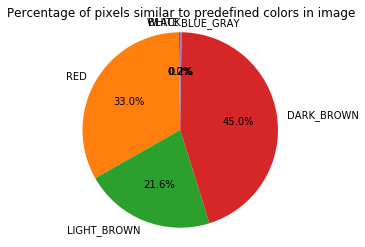

In [9]:
fig1, ax1 = plt.subplots()
ax1.pie(color_counter.values(), labels=color_counter.keys(), autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of pixels similar to predefined colors in image")
plt.show()

## Calculating mean, variance, maximum and minimum values of B, G, R channels.

In [10]:
B, G, R = cv2.split(img)

B = B.flatten()
G = G.flatten()
R = R.flatten()

In [11]:
B_mean = np.mean(B)
B_variance = np.var(B)
B_min = min(B)
B_max = max(B)
print("B_mean = {},\nB_variance = {},\nB_min = {},\nB_max = {}".format(B_mean, B_variance, B_min, B_max))

B_mean = 98.18116925941732,
B_variance = 2168.699536003356,
B_min = 15,
B_max = 255


In [12]:
G_mean = np.mean(G)
G_variance = np.var(G)
G_min = min(G)
G_max = max(G)
print("G_mean = {},\nG_variance = {},\nG_min = {},\nG_max = {}".format(G_mean, G_variance, G_min, G_max))

G_mean = 100.09985646118633,
G_variance = 2570.15831824762,
G_min = 15,
G_max = 255


In [13]:
R_mean = np.mean(R)
R_variance = np.var(R)
R_min = min(R)
R_max = max(R)
print("R_mean = {},\nR_variance = {},\nR_min = {},\nR_max = {}".format(R_mean, R_variance, R_min, R_max))

R_mean = 151.31116887147456,
R_variance = 2134.480083581561,
R_min = 40,
R_max = 255
